# Inclass Material: Data Wrangling and Visualization

* _This notebook was made based on main materials_: `3_Data_Wrangling_and_Visualization.ipynb`.
* _Version: Apollo - December 2024_.
* _Instructor_: Saskia Dwi Ulfah.

## Training Objectives

- _Python Reproducible Environment_
- _Working with Multi-Index DataFrames_
- _Reshaping DataFrame_
- _Visual Data Exploratory_
- _Using Group By Effectively_

----

***START OF DAY 1***

# Refresher: P4DA (Week 1) and EDA (Week 2)

2 minggu sebelumnya, kita sudah mempelajari fungsi-fungsi untuk melakukan inspeksi awal dan analisis lanjut pada data:

**_Python for Data Analyst: Data Inspection_**
- `.head()` dan `.tail()`: menampilkan data teratas dan data terbawah.
- `.describe()`: menampilkan nilai statistik pada data.
- `.shape` and `.size`: menampilkan ukuran data.
- `.axes`: menampilkan nama baris/indeks dan kolom.
- `.dtypes`: menampilkan tipe data setiap kolom.
- `.loc` dan `.iloc`: melakukan _indexing/subsetting/slicing_.

**_Exploraroty Data Analysis: Diagnostic and Exploratory_**
- _Tables_.
- _Cross-Tables and Aggregates_.
- _Using `aggfunc` for Aggregate Functions_.
- _Pivot Tables_.
- _Working with DateTime_.
- _Working with Categorical Data_.
- _Duplicates and Missing Value Treatment_.

---

# Python Reproducible Environment

Pada awal pembelajaran P4DA, kita sudah berkenalan dengan istilah ***virtual environment***.

> ***Virtual environment*** adalah *environment* terisolasi yang memungkinkan setiap *environment* memiliki instalasi dan versi *package* yang khusus dan berbeda. 

Kita bisa menggunakan *virtual environment* saat memiliki banyak projek di mana setiap projek membutuhkan *package* dengan versi yang spesifik. Dengan menggunakan *virtual environment*, kita bisa menjalankan berbagai macam projek pada satu *device* yang sama tanpa perlu khawatir akan adanya permasalahan yang timbul karena perbedaan versi *package*.

## ✨Exporting Requirements✨

Mbak Dwi adalah seorang *lead data scientist* di sebuah *company*. Mbak Dwi memulai sebuah projek analisis perbandingan saham di *device*-nya dan membuat *virtual environment* khusus untuk projek tersebut. Ia juga meng-*install* berbagai *package* yang digunakan untuk projek tersebut.

> ❓ Mbak Dwi ingin membagikan proyek analisis data tersebut kepada Mas Arkana, anggota timnya. Bagaimana cara projek tersebut dapat berjalan di *device* Mas Arkana tanpa menimbulkan *error*?

> 💡 Mbak Dwi dapat membuat *file* ✨`requirements.txt`✨ yang berisikan *package* yang sudah ada di-*environment*-nya dan menyerahkan *file* tersebut kepada Mas Arkana.

Lihat pada folder `/material_3_dwv_main`, Anda akan menemukan *file* `requirements.txt` yang isinya seperti ini:
```
matplotlib==3.7.1
numpy==1.24.2
pandas==2.0.0
yfinance==0.2.18
...
```
Untuk membuat `requirements.txt`, Mbak Dwi akan melakukan langkah-langkah berikut:

1. Buka terminal.

2. Aktifkan *environment*.
    ```
    conda activate <ENV_NAME>
    ```

    Apabila belum ada, maka perlu membuat *environment* baru:
    ```
    conda create -n <ENV_NAME> python=<PYTHON_VERSION>
    ```

3. Navigasikan *path* ke *folder* tempat di mana *file* `requirements.txt` ingin disimpan.
    ```
    cd <PATH_TO_REQUIREMENTS_FOLDER>
    ```

4. *Export environment*: membuat daftar *packages* beserta versinya.
    ```
    pip list --format=freeze > requirements.txt
    ```

    >💡 **Note**: Anda dapat menyimpan *file* dengan nama lain. Namun sebagai **konvensi**, biasa digunakan penamaan `requirements.txt`.

## ✨Importing Requirements✨

Setelah mendapatkan *file* `requirements.txt` dari Mbak Dwi, Mas Arkana dapat melakukan langkah berikut.

1. Buka terminal.

2. Aktifkan *environment* yang ingin digunakan.
    ```
    conda activate <ENV_NAME>
    ```

    Apabila belum ada, maka perlu membuat *environment* baru:
    ```
    conda create -n <ENV_NAME> python=<PYTHON_VERSION>
    ```

3. Navigasikan *path* ke *folder* di mana *file* `requirements.txt` berada.
    ```
    cd <PATH_TO_REQUIREMENTS>
    ```

4. Instalasi *package* yang terdapat pada *requirements.txt*.
    ```
    pip install -r requirements.txt
    ```

---

# Working with Multi-Index DataFrames

Pada pembelajaran kali ini, kita akan menggunakan *library* `yfinance` untuk mengakses data saham yang tersedia pada [Yahoo! Finance](https://finance.yahoo.com/). Penarikan data menggunakan _library_ `yfinance` membutuhkan koneksi internet.

> 📌 Dokumentasi *library* `yfinance`: https://pypi.org/project/yfinance/

In [1]:
# package untuk manipulasi data
import pandas as pd
# package untuk import data
import yfinance as data
# package untuk visualisasi data
import matplotlib.pyplot as plt

# atur format angka untuk float
pd.set_option('display.float_format', '{:,.3f}'.format)

In [2]:
# perusahaan yang akan ditarik datanya: BRI, Adaro, Telkom
symbol = ['BBRI.JK', 'ADRO.JK', 'TLKM.JK']
# range tanggal untuk mengambil data saham
start_date = '2018-01-01' 
end_date = '2023-12-31' # (exclusive) 

# penarikan data
stock = data.download(tickers = symbol, start = start_date, end = end_date)
stock.columns.names = ['Attributes', 'Symbols']

# 5 record teratas
stock.head()

[*********************100%%**********************]  3 of 3 completed


Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,383.594 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,360.732 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,223.559 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,215.939 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,261.663 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

**Penjelasan `Symbols`:**

- `ADRO.JK`: PT Adaro Energy Indonesia Tbk.
- `BBRI.JK`: PT Bank Rakyat Indonesia Tbk.
- `TLKM.JK`: PT Telkom Indonesia Tbk.

**Deskripsi Data:**

- `Date`: tanggal dalam format `yyyy-mm-dd`.
- `High`: nilai saham **tertinggi** di hari tersebut.
- `Low`: nilai saham **terendah** di hari tersebut.
- `Open`: nilai saham saat **_trading hours_ dibuka** di hari tersebut.
- `Close`: nilai saham saat **_trading hours_ ditutup** di hari tersebut.
- `Adj Close`: nilai `Close` yang telah disesuaikan _stock split_ dan pembagian dividen. 
- `Volume`: jumlah lembar saham yang berpindah tangan di hari tersebut (jumlah transaksi jual beli).

## ✨Saving DataFrame to File✨

Sebelumnya, kita sudah mempelajari bagaimana cara membaca data yang berformat `.csv` menggunakan fungsi `pd.read_csv()`. 

> ❓ Mbak Dwi harus menghadiri rapat di luar kantor. Ia meminta Mas Arkana untuk melanjutkan pembersihan dan analisis data yang telah ia mulai sebelumnya. Bagaimana cara Mbak Dwi dapat menyimpan *dataframe* hasil analisisnya menjadi sebuah *file* yang dapat digunakan oleh Mas Arkana?

> 📌 Menggunakan fungsi `.to_csv()` untuk data yang berformat `.csv`.

In [3]:
# simpan data format CSV 
# simpan ke folder data_cache
# simpan file dengan nama stock_csv.csv

stock.to_csv('data_cache/stock_csv.csv')

In [4]:
# read data

stock_loaded = pd.read_csv('data_cache/stock_csv.csv')
stock_loaded.head()

Attributes          Adj Close        Adj Close.1        Adj Close.2  \
0     Symbols            ADRO.JK            BBRI.JK            TLKM.JK   
1        Date                NaN                NaN                NaN   
2  2018-01-01  587.3004150390625  2503.332275390625   3383.59423828125   
3  2018-01-02   593.615478515625  2496.454833984375  3360.732177734375   
4  2018-01-03  577.8276977539062  2482.700439453125   3223.55908203125   

     Close            Close.1  Close.2     High             High.1   High.2  \
0  ADRO.JK            BBRI.JK  TLKM.JK  ADRO.JK            BBRI.JK  TLKM.JK   
1      NaN                NaN      NaN      NaN                NaN      NaN   
2   1860.0   3309.03369140625   4440.0   1860.0   3309.03369140625   4440.0   
3   1880.0  3299.943115234375   4410.0   1900.0     3381.759765625   4460.0   
4   1830.0  3281.761474609375   4230.0   1890.0  3299.943115234375   4380.0   

       Low              Low.1    Low.2     Open             Open.1   Open.2  \
0  ADRO.JK            BBRI.JK  TLKM.JK  ADRO.JK            BBRI.JK  TLKM.JK   
1      NaN                NaN      NaN      NaN                NaN      NaN   
2   1860.0   3309.03369140625   4440.0   1860.0   3309.03369140625   4440.0   
3   1865.0  3281.761474609375   4380.0   1865.0  3354.487548828125   4430.0   
4   1810.0    3236.3076171875   4200.0   1890.0  3299.943115234375   4380.0   

       Volume   Volume.1     Volume.2  
0     ADRO.JK    BBRI.JK      TLKM.JK  
1         NaN        NaN          NaN  
2         0.0          0          0.0  
3  26045000.0  100241541   66075600.0  
4  35595000.0   77164902  129205000.0

Ternyata struktur *dataset* yang diserahkan oleh Mbak Dwi menjadi tidak rapi setelah disimpan ke format `.csv` dan dipanggil kembali. Untuk mengatasi hal ini, Mbak Dwi bisa menyimpan *dataframe* dalam format `.pkl` atau *pickle*.

> 📌 ***Pickling***: menyimpan suatu objek Python ke sebuah _file binary_ (_byte stream_).

**🔎 Langkah-Langkah *Pickling***

1. Menyimpan data dengan fungsi `.to_pickle()`.
2. Membaca data dengan fungsi `pd.read_pickle()`.

In [5]:
# simpan ke format pickle
# simpan ke folder data_cache
# simpan file dengan nama stock.pkl

stock.to_pickle('data_cache/stock.pkl')

In [6]:
# read pickle
stock_pkl = pd.read_pickle('data_cache/stock.pkl')
stock_pkl.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,383.594 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,360.732 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,223.559 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,215.939 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,261.663 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

*Pickling* juga membantu kita untuk mempertahankan tipe data dari setiap kolom pada _dataframe_.

In [7]:
# membuat dummy data lalu konversi tipe data
dummy = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6, 7],
    'gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male'],
    'blood_type': ['O', 'A', 'B', 'AB', 'B', 'B', 'O'],
    'join_date': ['28 Jun 2021', '29 Jun 2021', '30 Jun 2021', '1 Jul 2021', '2 Jul 2021', '3 Jul 2021', '4 Jul 2021']
})

In [8]:
dummy.head()

id  gender blood_type    join_date
0   1    Male          O  28 Jun 2021
1   2  Female          A  29 Jun 2021
2   3    Male          B  30 Jun 2021
3   4  Female         AB   1 Jul 2021
4   5  Female          B   2 Jul 2021

In [9]:
dummy.dtypes

id             int64
gender        object
blood_type    object
join_date     object
dtype: object

In [10]:
# ubah tipe data
dummy[['gender', 'blood_type']] = dummy[['gender', 'blood_type']].astype('category')
dummy['join_date'] = dummy['join_date'].astype('datetime64[ns]')
dummy.dtypes

id                     int64
gender              category
blood_type          category
join_date     datetime64[ns]
dtype: object

Kita akan mencoba untuk menyimpan dalam format `.csv`.

In [11]:
# simpan ke file csv
dummy.to_csv('data_cache/dummy.csv', index=False)

# baca dari csv dan cek tipe data
pd.read_csv('data_cache/dummy.csv').dtypes

id             int64
gender        object
blood_type    object
join_date     object
dtype: object

> Terlihat bahwa tipe data dari kolom `gender`, `blood_type`, dan `join_date` terdeteksi sebagai `object`.

Kita akan mencoba untuk menyimpan dalam format `.pkl`.

In [12]:
# simpan object dummy ke file pickle
dummy.to_pickle('data_cache/dummy.pkl')

# baca dari pickle dan cek tipe data
pd.read_pickle('data_cache/dummy.pkl').dtypes

id                     int64
gender              category
blood_type          category
join_date     datetime64[ns]
dtype: object

> Tipe data sebelum data disimpan dan setelah data disimpan adalah sama.

**⚠️*Pros & Cons Pickle File***

Kelebihan:
- Mempertahankan struktur dari _dataframe_.
- Mempertahankan tipe data dari _dataframe_.

Kekurangan:
- Hanya bisa dibaca dengan Python dan tidak bisa langsung diakses dengan _double click_.
- _Pickle_ dari sumber yang tidak terpercaya rentan untuk menyebarkan _malware_.

## ✨Slicing Multi-Index DataFrame✨

Mari kita lihat kembali data `stock` sebelumnya.

In [13]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,383.594 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,360.732 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,223.559 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,215.939 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,261.663 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

Perhatikan bahwa kolom pada data `stock` memiliki susunan kolom yang berbeda dari yang sudah kita pelajari di minggu-minggu sebelumnya. `stock` memiliki kolom yang terdiri dari 2 level:

1. Level pertama (level 0): menunjukkan `Attributes`.
2. Level kedua (level 1): menunjukkan `Symbols`.

Data seperti ini disebut dengan ***multi-index dataframe***.

> 📌 ***Multi-index dataframe*** adalah *dataframe* yang memiliki >1 level indeks baris dan/atau level indeks kolom.

> ❓ Mas Arkana telah berhasil me-*load* *file* yang diberikan oleh Mbak Dwi. Dari data yang ada, ia ingin mengambil data harga saham BRI, Adaro, dan Telkom  saat *trading hours* ditutup (`Close`). Bagaimana cara melakukan *slicing* dari data yang ada?

In [14]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,383.594 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,360.732 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,223.559 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,215.939 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,261.663 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [15]:
# subsetting dengan []
# kode Pak Hadiat

stock['Close']

Symbols      ADRO.JK   BBRI.JK   TLKM.JK
Date                                    
2018-01-01 1,860.000 3,309.034 4,440.000
2018-01-02 1,880.000 3,299.943 4,410.000
2018-01-03 1,830.000 3,281.761 4,230.000
2018-01-04 1,915.000 3,227.217 4,220.000
2018-01-05 1,990.000 3,263.580 4,280.000
...              ...       ...       ...
2023-12-21 2,600.000 5,575.000 3,950.000
2023-12-22 2,590.000 5,675.000 3,960.000
2023-12-27 2,590.000 5,625.000 3,940.000
2023-12-28 2,580.000 5,725.000 3,960.000
2023-12-29 2,380.000 5,725.000 3,950.000

[1493 rows x 3 columns]

> ❓ Mas Arkana telah berhasil untuk mengambil detail `Close` untuk  ketiga perusahaan. Bagaimana cara mengambil detail `Close` untuk BRI saja?

In [16]:
# untuk menampilkan dalam bentuk series
# kode Pak Hadiat

stock['Close','BBRI.JK']

Date
2018-01-01   3,309.034
2018-01-02   3,299.943
2018-01-03   3,281.761
2018-01-04   3,227.217
2018-01-05   3,263.580
                ...   
2023-12-21   5,575.000
2023-12-22   5,675.000
2023-12-27   5,625.000
2023-12-28   5,725.000
2023-12-29   5,725.000
Name: (Close, BBRI.JK), Length: 1493, dtype: float64

In [17]:
# untuk menampilkan dalam bentuk dataframe
stock['Close'][['BBRI.JK']]

Symbols      BBRI.JK
Date                
2018-01-01 3,309.034
2018-01-02 3,299.943
2018-01-03 3,281.761
2018-01-04 3,227.217
2018-01-05 3,263.580
...              ...
2023-12-21 5,575.000
2023-12-22 5,675.000
2023-12-27 5,625.000
2023-12-28 5,725.000
2023-12-29 5,725.000

[1493 rows x 1 columns]

> ❓ Mas Arkana berhasil untuk mengambil detail `Close` untuk BRI dengan melakukan 2x *subsetting*. Sekarang, Mas Arkana ingin menganalisis semua *attribute* untuk BRI, mulai dari `Adj.Close` hingga `Volume`. Pendekatan seperti apa yang dapat dilakukan oleh Mas Arkana? 

In [18]:
stock.head()

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,383.594 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,360.732 1,880.000 3,299.943 4,410.000   
2018-01-03   577.828 2,482.700 3,223.559 1,830.000 3,281.761 4,230.000   
2018-01-04   604.667 2,441.437 3,215.939 1,915.000 3,227.217 4,220.000   
2018-01-05   628.348 2,468.946 3,261.663 1,990.000 3,263.580 4,280.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   
2018-01-03 1,890.000 3,299.943 4,380.000 1,810.000 3,236.308 4,200.000   
2018-01-04 1,935.000 3,281.761 4,250.000 1,850.000 3,145.400 4,190.000   
2018-01-05 1,990.000 3,263.580 4,280.000 1,935.000 3,199.945 4,200.000   

Attributes      Open                              Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK         ADRO.JK    BBRI.JK   
Date                                                                  
2018-01-01 1,860.000 3,309.034 4,440.000           0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000  26,045,000.000  100241541   
2018-01-03 1,890.000 3,299.943 4,380.000  35,595,000.000   77164902   
2018-01-04 1,860.000 3,281.761 4,230.000  81,191,500.000  172049901   
2018-01-05 1,935.000 3,227.217 4,220.000 112,355,500.000   95806814   

Attributes                  
Symbols            TLKM.JK  
Date                        
2018-01-01           0.000  
2018-01-02  66,075,600.000  
2018-01-03 129,205,000.000  
2018-01-04  77,953,300.000  
2018-01-05  55,863,000.000

In [19]:
# coba subsetting dengan []
# stock['BBRI.JK']

Kita akan mendapatkan _error_ seperti di atas. _Subsetting_ menggunakan kurung siku ([ ]) bisa kita gunakan untuk level paling atas, yakni `Attributes`. `BBRI.JK` berada di level di bawahnya, yaitu `Symbols`. Untuk menyelesaikan permasalahan tersebut, kita akan menggunakan **_cross section_**.

> 📌Kita dapat menggunakan fungsi `.xs()` untuk melakukan _cross section_.

**🔎 Parameter Penting Fungsi `.xs()`**

* `key`: label apa yang akan dicari.
* `level`: label tersebut berada di level apa/berapa.
* `axis`: level berada di baris (`axis = 0`) atau di kolom (`axis = 1`).
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html).

In [20]:
stock.head(2)

Attributes Adj Close                         Close                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01   587.300 2,503.332 3,383.594 1,860.000 3,309.034 4,440.000   
2018-01-02   593.615 2,496.455 3,360.732 1,880.000 3,299.943 4,410.000   

Attributes      High                           Low                      \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK   ADRO.JK   BBRI.JK   TLKM.JK   
Date                                                                     
2018-01-01 1,860.000 3,309.034 4,440.000 1,860.000 3,309.034 4,440.000   
2018-01-02 1,900.000 3,381.760 4,460.000 1,865.000 3,281.761 4,380.000   

Attributes      Open                             Volume             \
Symbols      ADRO.JK   BBRI.JK   TLKM.JK        ADRO.JK    BBRI.JK   
Date                                                                 
2018-01-01 1,860.000 3,309.034 4,440.000          0.000          0   
2018-01-02 1,865.000 3,354.488 4,430.000 26,045,000.000  100241541   

Attributes                 
Symbols           TLKM.JK  
Date                       
2018-01-01          0.000  
2018-01-02 66,075,600.000

In [21]:
# mengambil semua attributes untuk BBRI.JK dengan .xs()
stock.xs(
    key = 'BBRI.JK',
    level = 1,
    axis = 1
)

Attributes  Adj Close     Close      High       Low      Open     Volume
Date                                                                    
2018-01-01  2,503.332 3,309.034 3,309.034 3,309.034 3,309.034          0
2018-01-02  2,496.455 3,299.943 3,381.760 3,281.761 3,354.488  100241541
2018-01-03  2,482.700 3,281.761 3,299.943 3,236.308 3,299.943   77164902
2018-01-04  2,441.437 3,227.217 3,281.761 3,145.400 3,281.761  172049901
2018-01-05  2,468.946 3,263.580 3,263.580 3,199.945 3,227.217   95806814
...               ...       ...       ...       ...       ...        ...
2023-12-21  5,291.497 5,575.000 5,600.000 5,525.000 5,550.000   99049600
2023-12-22  5,386.412 5,675.000 5,700.000 5,600.000 5,650.000  109411300
2023-12-27  5,338.955 5,625.000 5,725.000 5,625.000 5,700.000  122236700
2023-12-28  5,433.869 5,725.000 5,750.000 5,675.000 5,700.000  121434600
2023-12-29  5,433.869 5,725.000 5,750.000 5,675.000 5,750.000   93126000

[1493 rows x 6 columns]

### 🧪 Knowledge Check: `.xs()` for Cross Section

Ambil semua data yang berhubungan dengan Telkom pada Oktober 2023!

***Hint***: Untuk mengambil data di bulan Oktober 2023 saja, gunakan `.loc[]`.

In [22]:
# code here: fill in the blank
# kode Pak Wisnu dan Pak Hadiat
tlkm_okt_2023 = stock.xs(key = 'TLKM.JK',
                        level = 1,
                        axis = 1).loc['2023-10',:]

In [23]:
tlkm_okt_2023.head()

Attributes  Adj Close     Close      High       Low      Open         Volume
Date                                                                        
2023-10-02  3,534.067 3,750.000 3,780.000 3,730.000 3,750.000 71,945,000.000
2023-10-03  3,552.916 3,770.000 3,800.000 3,740.000 3,750.000 61,155,100.000
2023-10-04  3,562.340 3,780.000 3,800.000 3,740.000 3,800.000 77,527,700.000
2023-10-05  3,505.795 3,720.000 3,800.000 3,720.000 3,790.000 81,258,900.000
2023-10-06  3,562.340 3,780.000 3,800.000 3,770.000 3,780.000 60,156,100.000

In [24]:
tlkm_okt_2023.tail()

Attributes  Adj Close     Close      High       Low      Open          Volume
Date                                                                         
2023-10-25  3,392.705 3,600.000 3,680.000 3,580.000 3,650.000  89,567,900.000
2023-10-26  3,279.615 3,480.000 3,610.000 3,460.000 3,600.000 141,139,700.000
2023-10-27  3,298.463 3,500.000 3,530.000 3,440.000 3,480.000  99,607,000.000
2023-10-30  3,223.070 3,420.000 3,500.000 3,390.000 3,500.000  82,945,500.000
2023-10-31  3,289.039 3,490.000 3,510.000 3,400.000 3,400.000  66,801,600.000

In [25]:
# kode Pak Albert

tlkm_okt_2023 = stock.xs(
    key='TLKM.JK',          
    level=1,                
    axis=1                  
).loc['2023-10-01':'2023-10-31']
tlkm_okt_2023

Attributes  Adj Close     Close      High       Low      Open          Volume
Date                                                                         
2023-10-02  3,534.067 3,750.000 3,780.000 3,730.000 3,750.000  71,945,000.000
2023-10-03  3,552.916 3,770.000 3,800.000 3,740.000 3,750.000  61,155,100.000
2023-10-04  3,562.340 3,780.000 3,800.000 3,740.000 3,800.000  77,527,700.000
2023-10-05  3,505.795 3,720.000 3,800.000 3,720.000 3,790.000  81,258,900.000
2023-10-06  3,562.340 3,780.000 3,800.000 3,770.000 3,780.000  60,156,100.000
2023-10-09  3,543.492 3,760.000 3,780.000 3,750.000 3,770.000  37,711,400.000
2023-10-10  3,590.613 3,810.000 3,820.000 3,770.000 3,780.000  51,167,900.000
2023-10-11  3,562.340 3,780.000 3,810.000 3,780.000 3,780.000  83,154,300.000
2023-10-12  3,609.461 3,830.000 3,870.000 3,800.000 3,820.000 101,645,100.000
2023-10-13  3,628.309 3,850.000 3,850.000 3,810.000 3,820.000  48,856,500.000
2023-10-16  3,543.492 3,760.000 3,850.000 3,740.000 3,850.000 117,472,800.000
2023-10-17  3,571.764 3,790.000 3,810.000 3,770.000 3,780.000  57,046,900.000
2023-10-18  3,534.067 3,750.000 3,780.000 3,730.000 3,770.000  64,910,600.000
2023-10-19  3,515.219 3,730.000 3,760.000 3,720.000 3,730.000  62,296,900.000
2023-10-20  3,486.947 3,700.000 3,730.000 3,690.000 3,720.000  38,978,200.000
2023-10-23  3,402.129 3,610.000 3,720.000 3,610.000 3,710.000  69,428,400.000
2023-10-24  3,439.826 3,650.000 3,670.000 3,600.000 3,640.000  67,041,700.000
2023-10-25  3,392.705 3,600.000 3,680.000 3,580.000 3,650.000  89,567,900.000
2023-10-26  3,279.615 3,480.000 3,610.000 3,460.000 3,600.000 141,139,700.000
2023-10-27  3,298.463 3,500.000 3,530.000 3,440.000 3,480.000  99,607,000.000
2023-10-30  3,223.070 3,420.000 3,500.000 3,390.000 3,500.000  82,945,500.000
2023-10-31  3,289.039 3,490.000 3,510.000 3,400.000 3,400.000  66,801,600.000

***END OF DAY 1***

---

***START OF DAY 2***

# Reshaping DataFrame

_Reshaping_ data adalah salah satu komponen penting dalam tahap _data wrangling_. _Reshaping_ memungkinkan seorang analis untuk mempersiapkan data menjadi bentuk yang sesuai untuk tahap analisis data berikutnya. Dalam hal ini, *reshaping* sering dilakukan sebelum visualisasi data. Fungsi-fungsi untuk _reshaping_ yang akan kita pelajari pada _course_ ini:

- `.stack()`.
- `.unstack()`.
- `.melt()`.
- `.pivot()`.

## ✨`.stack()`✨  

<center>
<img src="assets/reshaping_stack.png" width=60%/>
</center>

`DataFrame.stack()` digunakan untuk **memindahkan level pada kolom menjadi level pada baris**.

**🔎 Parameter Penting Fungsi `.stack()`**

* `level`: nama level/indeks level pada kolom yang akan dipindahkan. By default, kalau tidak didefinisikan, ia akan memindahkan level yang paling dalam.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html).

In [ ]:
# stock sebelum di-stack

stock.head(2)

In [ ]:
# stock setelah di-stack
# by default akan memindahkan level yang paling bawah pada kolom: Symbols

stacked_stock = 
stacked_stock

**Note:** Untuk `Date` sebelum dan sesudah di-stacking secara default, akan berperan sebagai level 1 (Python mengenali sbg level 0).

In [ ]:
# axes sebelum di-stack


In [ ]:
# axes setelah di-stack


Perhatikan bahwa:

* Sebelum _stacking_, _index_ pada baris hanya berupa tanggal: `Date`.
* Setelah _stacking_, _index_ pada baris bertambah menjadi tanggal dan simbol perusahaan: `Date` dan `Symbols`.

> ❓ Bagaimana cara agar `Attributes` yang dipindahkan menjadi baris?

In [ ]:
# memindahkan level Attributes menjadi level pada baris



## ✨`.unstack()`✨

<center>
<img src="assets/reshaping_unstack.png" width=60%/>
</center>

`DataFrame.unstack()` digunakan untuk **memindahkan level pada baris menjadi level pada kolom**. Kebalikan dari `DataFrame.stack()`.

**🔎 Parameter Penting Fungsi `.unstack()`**

* `level`: nama level/indeks level pada baris yang akan dipindahkan.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html).

In [ ]:
# unstack stacked_stock
# by default akan memindahkan level yang paling bawah pada baris: Symbols


Setelah kita melakukan _unstacking_ pada data yang sudah di-_stacking_, `stacked_stock`, kita mendapatkan data seperti semula.

> ❓ Bagaimana cara agar `Date` yang dipindahkan menjadi kolom?

In [ ]:
# memindahkan level Date menjadi level pada kolom



## 🧪 Knowledge Check: `.stack()` and `unstack()`

_Which of the following statement is correct?_

- [ ] `stack()` _changes the dataframe from wide to long_. 
- [ ] `stack()` _changes the dataframe from long to wide_. 
- [ ] `unstack()` _changes the dataframe from long to wide_. 
- [ ] `unstack()` _changes the dataframe from wide to long_. 

## 🤿 Dive Deeper

1. Bagaimana cara menukar level dari `Attributes` dan `Symbol` pada `stock`?

💡 ***Image of Expected Output***:
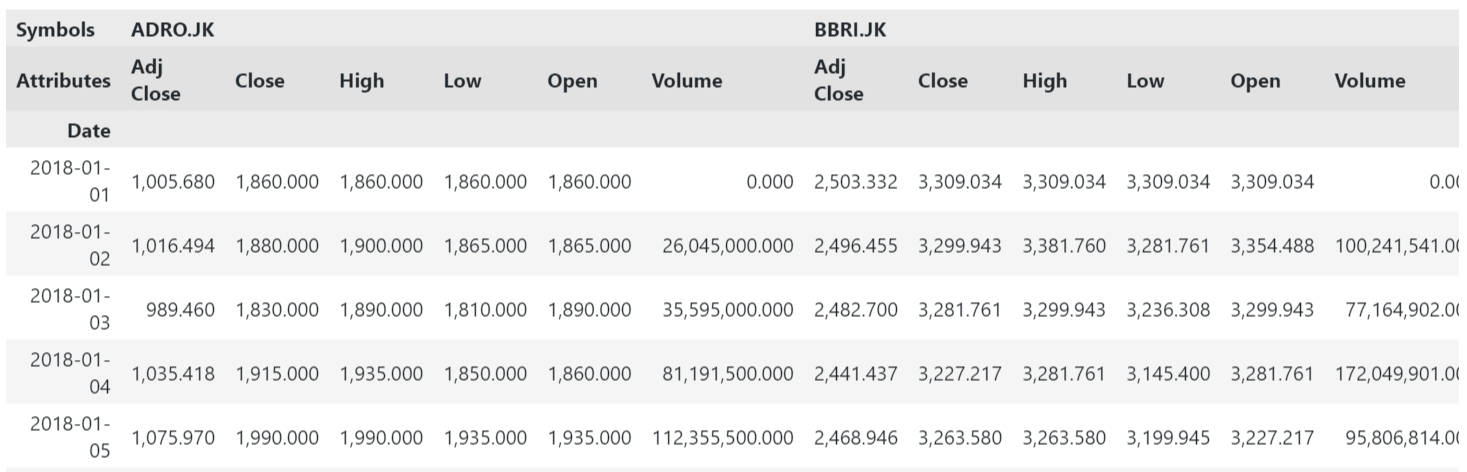

In [ ]:
# code here 


2. Buatlah kolom baru pada data `stock` dengan nama `Price Range`. Kolom `Price Range` merupakan selisih dari kolom `High` dan kolom `Low`.

    💡 ***Hint***: 
    1. Gunakan `.stack()` untuk membuat hanya 1 level pada kolom `stock`.
    2. Buat kolom yang diminta.
    3. Gunakan `.unstack()` untuk mengembalikan data ke bentuk semula

In [ ]:
# code here

# 1. Copy data stock ke variabel stock_copy1
stock_copy1 = 

In [ ]:
# 2. Lakukan stack pada stock_copy1 dan simpan pada stock_copy2
stock_copy2 = 
stock_copy2.head()

In [ ]:
# 3. Buat kolom Price Range pada stock_copy2
stock_copy2['Price Range'] = 
stock_copy2.head()

In [ ]:
# 4. Unstack stock_copy2


## ✨`.melt()`✨

<center>
<img src="assets/reshaping_melt.png" width=60%/>
</center>

`DataFrame.melt()` digunakan untuk **melebur beberapa kolom menjadi 1 kolom dan nilai di dalamnya menjadi 1 kolom lainnya**.

**🔎 Parameter Penting Fungsi `.melt()`**

* `id_vars`: kolom yang akan dipertahankan, berperan sebagai _identifier_.
* `value_vars`: kolom yang akan dilebur.
* `var_name`: nama kolom untuk variabel.
* `value_name`: nama kolom untuk _value_.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.melt.html).

> ❓ Ambil semua detail yang berhubungan dengan perusahaan Adaro dan simpan pada variabel `adaro`.

In [ ]:
# ambil semua detail untuk ADRO.JK

adaro = 
adaro.head(2)

Gunakan fungsi `.melt()` untuk `adaro`.

Perhatikan bahwa setelah dilakukan *melting*, kita mendapatkan 2 kolom:

* Kolom `Attributes`: menyimpan nama-nama kolom yang di-*melt*.
* Kolom `value`: menyimpan nilai-nilai kolom yang di-*melt*.

> ❓ Setelah melakukan _melting_ di atas, detail tanggal pada data kita hilang **karena berperan sebagai indeks dari baris**. Bagaimana memunculkan tanggal walaupun sudah dilakukan _melting_?

In [ ]:
# jadikan tanggal sebagai kolom biasa dengan fungsi .reset_index()
# piping dengan melakukan .melt()



Setelah kita me-_reset_ _index_ dan melakukan _melting_ dengan fungsi `.melt()` tanpa mengatur argumen apapun, data `Date` kita juga ikut di-_melt_. Bentuk data di atas tidak terlalu kita inginkan. Oleh karena itu, kita akan mencoba untuk mengatur parameter pada `.melt()`.

### ▶️ Identifier dan Value

Terdapat 2 parameter pada `.melt()` yang sering digunakan:

* `id_vars`: kolom yang akan dipertahankan, berperan sebagai _identifier_.
* `value_vars`: kolom yang akan dilebur.

In [ ]:
# memunculkan tanggal, tetapi tanggal tidak di-melt: 
# 1. gunakan .reset_index()
# 2. gunakan .melt dan masukkan Date sebagai id_vars



> ❓ Lakukan _melting_ hanya pada kolom `Open` dan `Close`. Kolom `Date` digunakan sebagai *identifier*.

Kita dapat mengubah nama kolom `Attributes` (kolom yang menampung nama variabel) dengan parameter `var_name` dan mengubah nama kolom untuk *value* dengan parameter `value_name`.

> ❓ Melanjutkan pertanyaan sebelumnya, berikan nama untuk kolom variabel menjadi `Open and Close` dan nama untuk kolom _value_ menjadi `Price`. Simpan dalam variabel bernama `adaro_open_close`.

In [ ]:
adaro.reset_index()

In [ ]:
adaro_open_close = 
adaro_open_close.head()

> ❓ Bagaimana mengurutkan `adaro_open_close` sehingga harga `Open` dan `Close` di hari yang sama dapat berdekatan?

In [ ]:
adaro_open_close.head()

## ✨`.pivot()`✨

<center>
<img src="assets/reshaping_pivot.png" width=60%/>
</center>

`DataFrame.pivot()` merupakan kebalikan dari `DataFrame.melt()`.

**🔎 Parameter Penting Fungsi `.pivot()`**

* `columns`: kolom yang akan diuraikan.
* `index`: kolom yang dijadikan _index_/kolom mana yang tidak akan diuraikan.
* `values`: kolom yang akan mengisi _value_ dari kolom yang baru dibuat.
* Parameter lainnya dapat dilihat pada [dokumentasi berikut](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html).

Mari lihat kembali bagaimana data `adaro_open_close` kita sebelumnya.

In [ ]:
adaro_open_close.head()

# Open and Close --> kolom hasil melting yang menyimpan nama kolom yang dilebur
# Price --> kolom hasil melting yang menyimpan nilai dari kolom yang dilebur

In [ ]:
# menggunakan .pivot() pada data adaro_open_close


Terlihat pada kode di atas, setelah kita menggunakan fungsi `.pivot()`:

* Kolom `Open and Close` akan dipecah menjadi 2 kolom: `Close` dan `Open`.
* Nilai pada kolom `Close` dan `Open` berasal dari kolom `Price`.

## 🧪 Knowledge Check: `.melt()` vs `.stack()`

Persamaan antara `melt()` dan `stack()`: 
- ...

Apa perbedaan antara `melt()` dan `stack()` ?
- `stack()` = ...
- `melt()` = ...

## 📝 Notes

**▶️ Perbedaan `.pivot_table()` dan `.pivot()`**
 
- `.pivot_table()` untuk membuat tabel agregasi (ada nilai yang dirangkum).
- `.pivot()` hanya untuk _reshaping_ (tidak ada nilai yang dirangkum).

**▶️ *Quick Summary***

- Melakukan *slicing* pada *dataframe* yang *multi-index*: 
    + Menggunakan fungsi `.xs()`.
- Melakukan *reshaping*:
    + *Wide to Long*:
       - Menggunakan fungsi `.stack()`: untuk *multi-index dataframe*.
         - Fungsi: memindahkan kolom jadi baris.
       - Menggunakan fungsi `.melt()`: untuk *single-index dataframe*.
         - Fungsi: melebur/menyatukan beberapa kolom.
    + *Long to Wide*:
       - Menggunakan fungsi `.unstack()`: untuk *multi-index dataframe*.
         - Fungsi: memindahkan baris jadi kolom.
       - Menggunakan fungsi `.pivot()`: untuk *single-index dataframe*.
         - Fungsi: menguraikan 1 kolom menjadi beberapa kolom.
- Mengubah *index* menjadi kolom:
    + Menggunakan fungsi `.reset_index()`.

---

# Visual Data Exploratory

🔎 **Tujuan Visualisasi**

- ***Exploratory***: proses  **mengeksplorasi data** untuk **mendapatkan sebuah _insight_**. Visualisasi yang ditampilkan biasanya sederhana. Analogi: mencari dan mendapatkan batu permata di antara ratusan batu biasa.
- ***Explanatory***: proses untuk menjelaskan atau **menyajikan _insight_** (*_explain_*) yang didapat dari hasil _exploratory_ kepada _user_/_audience_. Visualisasi yang ditampilkan biasanya lebih menarik dan meng-*highlight* _insight_ secara spesifik. Analogi: memoles batu permata tersebut dan menawarkannya kepada pembeli.

Pada _course_ ini, kita akan fokus pada cara menampilkan visualisasi data yang **informatif dan tepat** (*exploratory*). Untuk memperindah tampilan visualisasi dapat didalami secara mandiri melalui dokumentasi yang tersedia.

## ✨`pandas` dan `matplotlib`✨

`matplotlib` merupakan _package_ yang sering digunakan untuk membuat visualisasi data. Menariknya, kita dapat memanfaatkan fungsionalitas dari `matplotlib` melalui _method_ `.plot()` dari _dataframe_.

> ❓ Mbak Dwi sudah kembali dari agenda rapatnya. Sekarang, ia bersama Mas Arkana akan membuat  beberapa visualisasi yang akan dijadikan bahan diskusi dengan tim *data scientist* lainnya. Visualisasi pertama yang akan dibuat adalah pergerakan `Volume` dari ketiga perusahaan selama **50 hari terakhir**.

In [ ]:
stock.head()

In [ ]:
# 50 data Volume terakhir



In [ ]:
# membuat visualisasi dari 50 data Volume terakhir


Dari visualisasi di atas:

* Sumbu x menunjukkan: nilai `Date`.
* Sumbu y menunjukkan: nilai `Volume`.
* Setiap garis mewakili perusahaan yang berbeda: `ADRO.JK`, `BBRI.JK`, dan `TLKM.JK`.    

📈 ***Insight***:

* ...

Kita juga dapat mengatur _style_ dari visualisasi dengan fungsi `plt.style.use()`.

In [ ]:
# style yang tersedia
print(plt.style.available)

In [ ]:
# menggunakan style seaborn-v0_8



In [ ]:
# visualisasi ulang setelah mengatur style



> ❓ Ternyata berdasarkan visualisasi sebelumnya, `ADRO.JK` adalah saham dengan angka volume yang cenderung terendah dibandingkan dengan dua perusahaannya. Selanjutnya, Mbak Dwi dan Mas Arkana akan membuat visualisasi pergerakan saham `ADRO.JK` selama tahun 2023.

In [ ]:
stock.head()

In [ ]:
# subsetting untuk mendapatkan atribut ADRO.JK selama 2023

adaro_2023 = 

In [ ]:
adaro_2023.head()

In [ ]:
# visualisasi data adaro_2023



💭 **Diskusi:** Apakah visualisasi tersebut sudah cukup informatif dan tepat?

In [ ]:
# cek nilai maksimum untuk Volume


In [ ]:
# cek nilai maksimum untuk Open


In [ ]:
# buat visualisasi dengan meng-exclude kolom Volume


📈 ***Insight***:

* ...

## ✨Tipe-Tipe Visualisasi✨

Perhatikan bahwa kita tidak memasukkan argumen apapun ke dalam fungsi `.plot()`. _By default_, jenis visualisasi yang digunakan adalah _lineplot_. Terdapat beberapa jenis visualisasi lain yang bisa kita gunakan.

* **Visualisasi untuk Satu Kolom**

    - Data kategorik:
        - **`.plot(kind='bar')` untuk _barplot_ (diagram batang)**.
        - **`.plot(kind='barh')` untuk _horizontal barplot_**.
        - **`.plot(kind='box')` untuk _boxplot_**.
        - `.plot(kind='pie')` untuk _pie chart_.
    
    - Data numerik:
        - **`.plot(kind='hist')` untuk histogram**.
        - `.plot(kind='density')` untuk *density plot*.
        - `.plot(kind='area')` untuk *area plot.*


* **Visualisasi untuk Dua Kolom**

    - `.plot(kind='scatter')` untuk _scatterplot_.
    - `.plot(kind='hexbin')` untuk _hexagonal binning plot_.

> 📌 Panduan untuk menentukan tipe visualisasi yang tepat: https://www.data-to-viz.com/.

> 📌 Dokumentasi fungsi `.plot()`: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html.

### 1️⃣ Barplot

> 📌 **_Barplot_** digunakan untuk melihat **perbandingan** beberapa **kategori**.

> ❓ Selanjutnya, Mbak Dwi dan Mas Arkana ingin **membandingkan tingkat fluktuasi** nilai `High` pada masing-masing perusahaan menggunakan *coefficient of variation*. *Insight* yang didapatkan pada analisis ini dapat dimanfaatkan untuk mengurutkan perusahaan mana yang pergerakan sahamnya yang cukup stabil dan mana yang tidak.

> 📌 Info lebih lanjut terkait [coefficient of variation](https://www.investopedia.com/terms/c/coefficientofvariation.asp)

$$CoV = \frac{std}{mean}$$

In [ ]:
# mengambil nilai coefficient of variation
coef_of_var = 
coef_of_var

In [ ]:
# membuat barplot 


In [ ]:
# tampilkan barplot secara berurutan: dari yang paling rendah ke yang paling tinggi



📈 ***Insight***:

* ...

In [ ]:
# parameter lain dari .plot()


### 2️⃣ Horizontal Barplot

> 📌 **_Horizontal barplot_** digunakan untuk melihat **perbandingan** beberapa **kategori secara horizontal** .

In [ ]:
# membuat horizontal barplot dari data coef_of_var



In [ ]:
# tampilkan horizontal barplot secara berurutan: dari yang paling rendah ke yang paling tinggi


🔎 ***Barplot vs Horizontal Barplot***

* _Barplot_:  digunakan saat ingin membuat perbandingan yang sudah memiliki urutan, misalnya tingkat pendidikan dan waktu.
* _Horizontal barplot_: digunakan saat ingin melihat _ranking_.

> ❓ Dengan contoh di atas, kita sebaiknya menggunakan apa? ...

### 3️⃣ Histogram

> 📌 **Histogram** digunakan untuk melihat **persebaran** data numerik.

>❓ Berdasarkan hasil analisis sebelumnya, `TLKM.JK` adalah perusahaan yang CoV-nya paling kecil dibandingkan BRI dan Adaro. Selanjutnya, mereka berdua ingin melihat lebih lanjut, bagaimanakah **persebaran** `Volume` pada saham `TLKM.JK`?

In [ ]:
stock.head()

In [ ]:
# ambil data Volume pada TLKM.JK dan simpan ke variabel vol_telkom
vol_telkom = 
vol_telkom.head()

In [ ]:
# visualisasi histogram 


📈 ***Insight***:

* ...

### 🧪 Knowledge Check: Barplot vs Histogram

Setelah mempelajari kedua jenis visualisasi di atas: _barplot_ dan histogram, apa perbedaan kedua visualisasi tersebut?

1. Variabel yang digunakan 
    * Barplot: ...
    * Histogram: ...
2. Bentuk
    * Barplot: ...
    * Histogram: ...
3. Kegunaan
    * Barplot: ...
    * Histogram: ...


### 4️⃣ Boxplot

> 📌 ***Boxplot*** digunakan untuk melihat ***5 number summary*** & **membandingkan persebaran** dari beberapa kategori.

<center>
<img src="assets/boxplot.png" width="600"/>
<center/>

**Cara Membaca Informasi Dari Boxplot**
* Jika ada outlier di data kita, maka whisker menunjukkan batas outlier, yaitu Q1-1.5*IQR atau Q3+1.5*IQR (kalau titik di luar kumis (whisker)).
* Jika tidak ada outlier (tidak ada titik di luar kumis (whisker)), kumis (whisker) menunjukkan nilai minimum atau maximum dari data.

**Note**: Whisker ditunjukkan oleh area berwarna ungu.

**Bagian-Bagian dari Boxplot**

- Q1: kuartil 1 (data ke 25%).
- Median: kuartil 2 (data ke 50%).
- Q3: kuartil 3 (data ke 75%).
- _Lower whisker_: pagar bawah.
- _Upper whisker_: pagar atas.
- Data di luar pagar akan dianggap sebagai _outlier_ atau data pencilan.

> ⚠️ _Lower whisker_ bukan nilai minimum data. _Upper whisker_ juga bukan nilai maksimum data.

**💡 Tips: Informasi yang Bisa Didapatkan dari *Boxplot***

1. Garis kuning pada kotak, menunjukkan nilai tengah atau median pada data.
2. Letak garis median menunjukkan persebaran data.
    * Jika letak garis median tepat di tengah kotak, maka banyak nilai-nilai yang kecil dan banyak nilai-nilai yang besar adalah sama.
    * Jika letak garis median mendekati garis Q1, kebanyakan nilai-nilai pada data adalah nilai yang kecil.
    * Jika letak garis median mendekati garis Q2, kebanyakan nilai-nilai pada data adalah nilai yang besar.
3. Lebar kotak menunjukkan tingkat variasi
    * Semakin panjang kotak, semakin bervariasi nilai pada data.
4. Titik-titik di luar *whiskers* menunjukkan data pencilan.
    * Data pencilan adalah data yang < Q1-1.5*IQR atau >Q3+1.5*IQR

> ❓ Untuk mendapatkan *insight* yang lebih lengkap, Mbak Dwi dan Mas Arkana **membandingkan persebaran** untuk ketiga saham menggunakan *boxplot*.

In [ ]:
# menampilan boxplot untuk membandingkan persebaran Volume dari ketiga saham



Gunakan parameter `vert=False` untuk melihat _boxplot_ secara horizontal.

📈 ***Insight***:

* ...

Selain menggunakan `.plot(kind = "box")`, kita juga bisa menggunakan fungsi `.boxplot()` untuk membuat *boxplot*,

> ❓ Di tengah pengerjaan analisis perbandingan saham ini, Mbak Dwi mendapatkan *request* untuk membandingkan `Volume` dari `BBRI.JK` setiap kuater tahun 2023. Bantulah Mbak Dwi untuk memenuhi *request* tersebut!

In [ ]:
# ambil data Volume BBRI.JK

vol_bri = 
vol_bri.head()

In [ ]:
# slicing hanya tahun 2023
vol_bri_2023 = 
vol_bri_2023.head()

In [ ]:
# buat kolom baru, Quarter, yang menunjukkan kuarter dari waktu yang diberikan 

vol_bri_2023['Quarter'] = 
vol_bri_2023.head()

In [ ]:
# nilai unique  Quarter


In [ ]:
# visualisasi


### (Additional) Other Python Libraries for Visualization

Apabila Anda tertarik mengenai visualisasi di Python, silakan eksplorasi lebih lanjut _package_-_package_ berikut.

- `matplotlib`: semua elemen pada visualisasi dapat dikustomisasi, namun membutuhkan _code_ yang lebih panjang. [Dokumentasi Matplotlib](https://matplotlib.org/3.2.2/tutorials/index.html) 
- `seaborn`: dikembangkan dari `matplotlib`. Lebih sedikit yang dapat dikustomisasi, namun lebih mudah. [Dokumentasi Seaborn](https://seaborn.pydata.org/introduction.html)
- `plotly`: plot interaktif serta kompatibilitas dengan bahasa lain yang tinggi. [Dokumentasi Plotly](https://plotly.com/python/)
- `altair`: plot interaktif yang bersifat deklaratif dan _code_ relatif lebih mudah. [Dokumentasi Altair](https://altair-viz.github.io/index.html)

Referensi perbandingan _library_ dapat Anda lihat [di sini](https://askalgo-py.netlify.app/faq/dwv#adakah-library-visualisasi-data-di-python-selain-matplotlib).

---

# Using Group By Effectively

Teknik yang tidak kalah penting adalah operasi ***group by***. Mungkin untuk Anda yang sudah pernah menggunakan SQL atau _tools_ lain seperti `tidyverse` pada bahasa pemrograman R akan familiar dengan operasi _group by_ ini.

Misalkan kita punya *dataframe* `close_melted` yang menyimpan data `Close` harian dari setiap perusahaan.

In [ ]:
stock.head()

In [ ]:
stock['Close'].head()

In [ ]:
# membuat dataframe close_melted
close_melted  = stock['Close'].reset_index().melt(
    id_vars = 'Date',
    value_name = "Close",
    var_name = "Perusahaan"
)
close_melted

> ❓ Untuk melengkapi analisis sebelumnya, Mbak Dwi dan Mas Arkana ingin melihat, di antara ADRO.JK, BBRI.JK, TLKM.JK, manakah saham yang memiliki **rata-rata** `Close` harian tertinggi? 

Untuk menyelesaikan *case* di atas, kita perlu membuat tabel agregasi terlebih dahulu. Buatlah tabel agregasi dengan `.crosstab()` atau `.pivot_table()`!

▶️ Dengan `.crosstab()`

In [ ]:
# dengan crosstab 


▶️ Dengan `.pivot_table()`

In [ ]:
# dengan pivot_table


Perbedaan antara `crosstab` dan `pivot_table` dapat dirangkum dalam tabel berikut:

|                                                                                    | `.crosstab()` | `.pivot_table()` |
|------------------------------------------------------------------------------------|-----------------|--------------------|
|                                                                          **Input** | Array of values/Series |          DataFrame (parameter `data`)|
|                                                              **Default `aggfunc`** |       `'count'` |           `'mean'` |
|                                                          **Parameter `columns`** |       Mandatory |      Optional |
|                                                          **Parameter `normalize`** |       Available |      Not Available |
| [**Computation Time**](https://ramiro.org/notebook/pandas-crosstab-groupby-pivot/) | Relatively Slower |  Relatively Faster |

▶️ Dengan `.groupby()`

Selain menggunakan `pd.crosstab()` atau `.pivot_table`, salah satu fungsi yang dapat dimanfaatkan untuk melakukan agregasi data adalah method `.groupby()`.

Proses agregasi dengan `.groupby()` merupakan gabungan dari proses:

1. ***Split***: memisahkan baris berdasarkan suatu kategori.
2. ***Apply***: menerapkan fungsi agregasi untuk masing-masing grup.
3. ***Combine***: mengembalikan hasil dalam bentuk 1 tabel.

```python
df.groupby('kolom_category').aggfunc()
```

atau

```python
df.groupby('kolom_category')['kolom_numerik'].aggfunc()
```

💡 Berikut beberapa fungsi agregasi yang dapat digunakan pada `pandas`:

- `.count()`- jumlah baris
- `.sum()` - penjumlahan
- `.mean()` - rata-rata 
- `.median()` - median
- `.min()` - minimum
- `.max()` - maximum
- `.mode()` - modus
- `.std()` - standard deviasi
- `.var()`- variansi

In [ ]:
# dengan groupby


Selanjutnya, buat visualisasi dengan *barchart*.

## ✨Grouped Barchart✨

> ❓ Jika pada analisis sebelumnya Mbak Dwi dan Mas Arkana hanya menghitung rata-rata nilai `Close` secara keseluruhan, kali ini, mereka ingin membuat visualisasi yang dapat membandingkan rata-rata nilai `Close` untu ketiga saham setiap bulannya. 

Untuk *case* di atas, kita bisa menggunakan ***grouped barchart***.

* Buatlah *dataframe*  `closing_price` yang berisikan nilai `Close` untuk ketiga saham.
* Tampilkan nilai rata-rata `Close` untuk setiap bulannya pada tabel agregasi `mean_closing`.

In [ ]:
# buat dataframe closing_price
closing_price = 
closing_price.head()

In [ ]:
# buat kolom baru pada closing_price: Month
closing_price['Month'] = 

In [ ]:
closing_price.head()

In [ ]:
# buat tabel agregasi mean_closing
mean_closing = 
mean_closing

Selanjutnya, kita akan membuat *grouped barchart*.

In [ ]:
# improvement visualisasi
# perbaiki urutan bulan
months = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']



### 🧪 Knowledge Check: `.groupby()`

Misalkan Anda dihadapkan dengan *long dataframe* seperti pada `closingprice_melt` berikut.

In [ ]:
closingprice_melt = closing_price.melt(id_vars='Month', value_name='Close')
closingprice_melt

In [ ]:
mean_closing.head()

🧐 Bagaimana cara kita mengubah bentuk `closingprice_melt` menjadi `mean_closing`?

***Hint:*** Gunakan teknik _group by_ dan juga _reshaping_.

In [ ]:
# code here


## ✨Combining `.agg()` and `.groupby()`✨

Pada bagian sebelumnya, kita sudah mengetahui bahwa penggunaan `.groupby()` diikuti dengan sebuah fungsi agregasi. Misalnya, jika ingin menghitung rata-rata, maka kita menggunakan `.mean()`. Terdapat fungsi lain, `.agg()` yang memungkinkan kita untuk menggunakan fungsi agregasi yang berbeda-beda.

Misalkan terdapat memiliki data `stock_long` sebagai berikut.

In [ ]:
stock_long = stock.stack().reset_index()
stock_long.head()

❓ Jika pada analisis sebelumnya Mbak Dwi dan Mas Arkana hanya terfokus pada satu kolom, kali ini, mereka ingin membandingkan beberapa aspek berikut dari ketiga perusahaan:

- Harga maksimum dari `High` untuk ketiga perusahaan (`max` dari `High`)
- Harga minimum dari `Low` untuk ketiga perusahaan  (`min` dari `Low`)
- Rata-rata *closing price* untuk ketiga perusahaan (`mean` dari `Close`)

Untuk mendapat hasil tersebut, kita harus melakukan _chaining_ `.groupby()` dengan method `.agg()`. Kita harus menyertakan _mapping_ (*dictionary*) untuk setiap kolom dengan fungsi agregasinya seperti berikut ini.

In [ ]:
# dengan .groupby()
# dictionary {key : value}

summary_stock = stock_long.groupby(by='Symbols').agg({
    'High':'max',
    'Low':'min',
    'Close':'mean'
})
summary_stock

Visualisasikan tabel agregasi di atas untuk membandingkan nilai tersebut.

In [ ]:
# visualisasi


## 🧪 Knowledge Check: Visualization

Perhatikan _dataframe_ `monthly_closing` berikut.

In [ ]:
stock['YearMonth'] = stock.index.to_period('M')
monthly_closing = stock.groupby('YearMonth').mean()['Close']
monthly_closing.head()

Tipe plot mana yang paling sesuai untuk data di atas, apabila kita ingin melihat pergerakan nilai `Close` dari waktu ke waktu?

- [ ] _Line plot_ `.plot()`
- [ ] _Scatter plot_ `.plot.scatter(x, y)` 
- [ ] _Bar plot_ `.plot.bar()` 
- [ ] _Box plot_ `.plot.box()` 

---

# Referensi

* Dokumentasi per Fungsi 
    * [Dokumentasi `.xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html)
    * [Dokumentasi `.stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html)
    * [Dokumentasi `.unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
    * [Dokumentasi `.pivot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
    * [Dokumentasi `.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)
* Dokumentasi Resmi
    * [Pandas](https://pandas.pydata.org/)
    * [Matplotlib](https://matplotlib.org/)
    * [Seaborn](https://seaborn.pydata.org/)
    * [Plotly](https://plotly.com/)
    * [Altair](https://altair-viz.github.io/)
* From Algoritma
    * [AskAlgo Python](https://askalgo-py.netlify.app/)

# Inclass Questions

* **Q: Fungsi `.xs()` apakah bisa mengambil data tertentu, seperti ADRO.JK hanya High dan Low, BBRI.JK hanya High, Low, dan Close dalam sekali `.xs()`? Apakah subsetting dengan `[]` ada kelebihannya dibanding `.xs()`?**

Sayangnya, tidak sepenuhnya bisa. Fungsi `.xs()` hanya memungkinkan pengambilan data berdasarkan satu level indeks pada satu waktu. Jika kita ingin memilih kombinasi spesifik dari beberapa level, seperti ADRO.JK dan BBRI.JK dengan kolom tertentu, diperlukan beberapa pemanggilan `.xs()` dan penggabungan hasilnya.
 
Dengan **`loc`**, kita bisa langsung memilih kolom spesifik dalam satu langkah dengan lebih sederhana dan fleksibel.

**Contoh Kode**:
```python
stock.loc[:, [
    ('ADRO.JK', 'High'),
    ('ADRO.JK', 'Low'),
    ('BBRI.JK', 'High'),
    ('BBRI.JK', 'Low'),
    ('BBRI.JK', 'Close')
]]
```  
Kode ini lebih efisien dibandingkan menggunakan `.xs()` berkali-kali.

In [44]:
stock.loc[:,[('High','ADRO.JK'),
             ('Low','ADRO.JK'),
             ('High','BBRI.JK'),
             ('Low','BBRI.JK'),
             ('Close','BBRI.JK')]]

Attributes      High       Low      High       Low     Close
Symbols      ADRO.JK   ADRO.JK   BBRI.JK   BBRI.JK   BBRI.JK
Date                                                        
2018-01-01 1,860.000 1,860.000 3,309.034 3,309.034 3,309.034
2018-01-02 1,900.000 1,865.000 3,381.760 3,281.761 3,299.943
2018-01-03 1,890.000 1,810.000 3,299.943 3,236.308 3,281.761
2018-01-04 1,935.000 1,850.000 3,281.761 3,145.400 3,227.217
2018-01-05 1,990.000 1,935.000 3,263.580 3,199.945 3,263.580
...              ...       ...       ...       ...       ...
2023-12-21 2,610.000 2,570.000 5,600.000 5,525.000 5,575.000
2023-12-22 2,610.000 2,580.000 5,700.000 5,600.000 5,675.000
2023-12-27 2,630.000 2,580.000 5,725.000 5,625.000 5,625.000
2023-12-28 2,610.000 2,560.000 5,750.000 5,675.000 5,725.000
2023-12-29 2,430.000 2,370.000 5,750.000 5,675.000 5,725.000

[1493 rows x 5 columns]